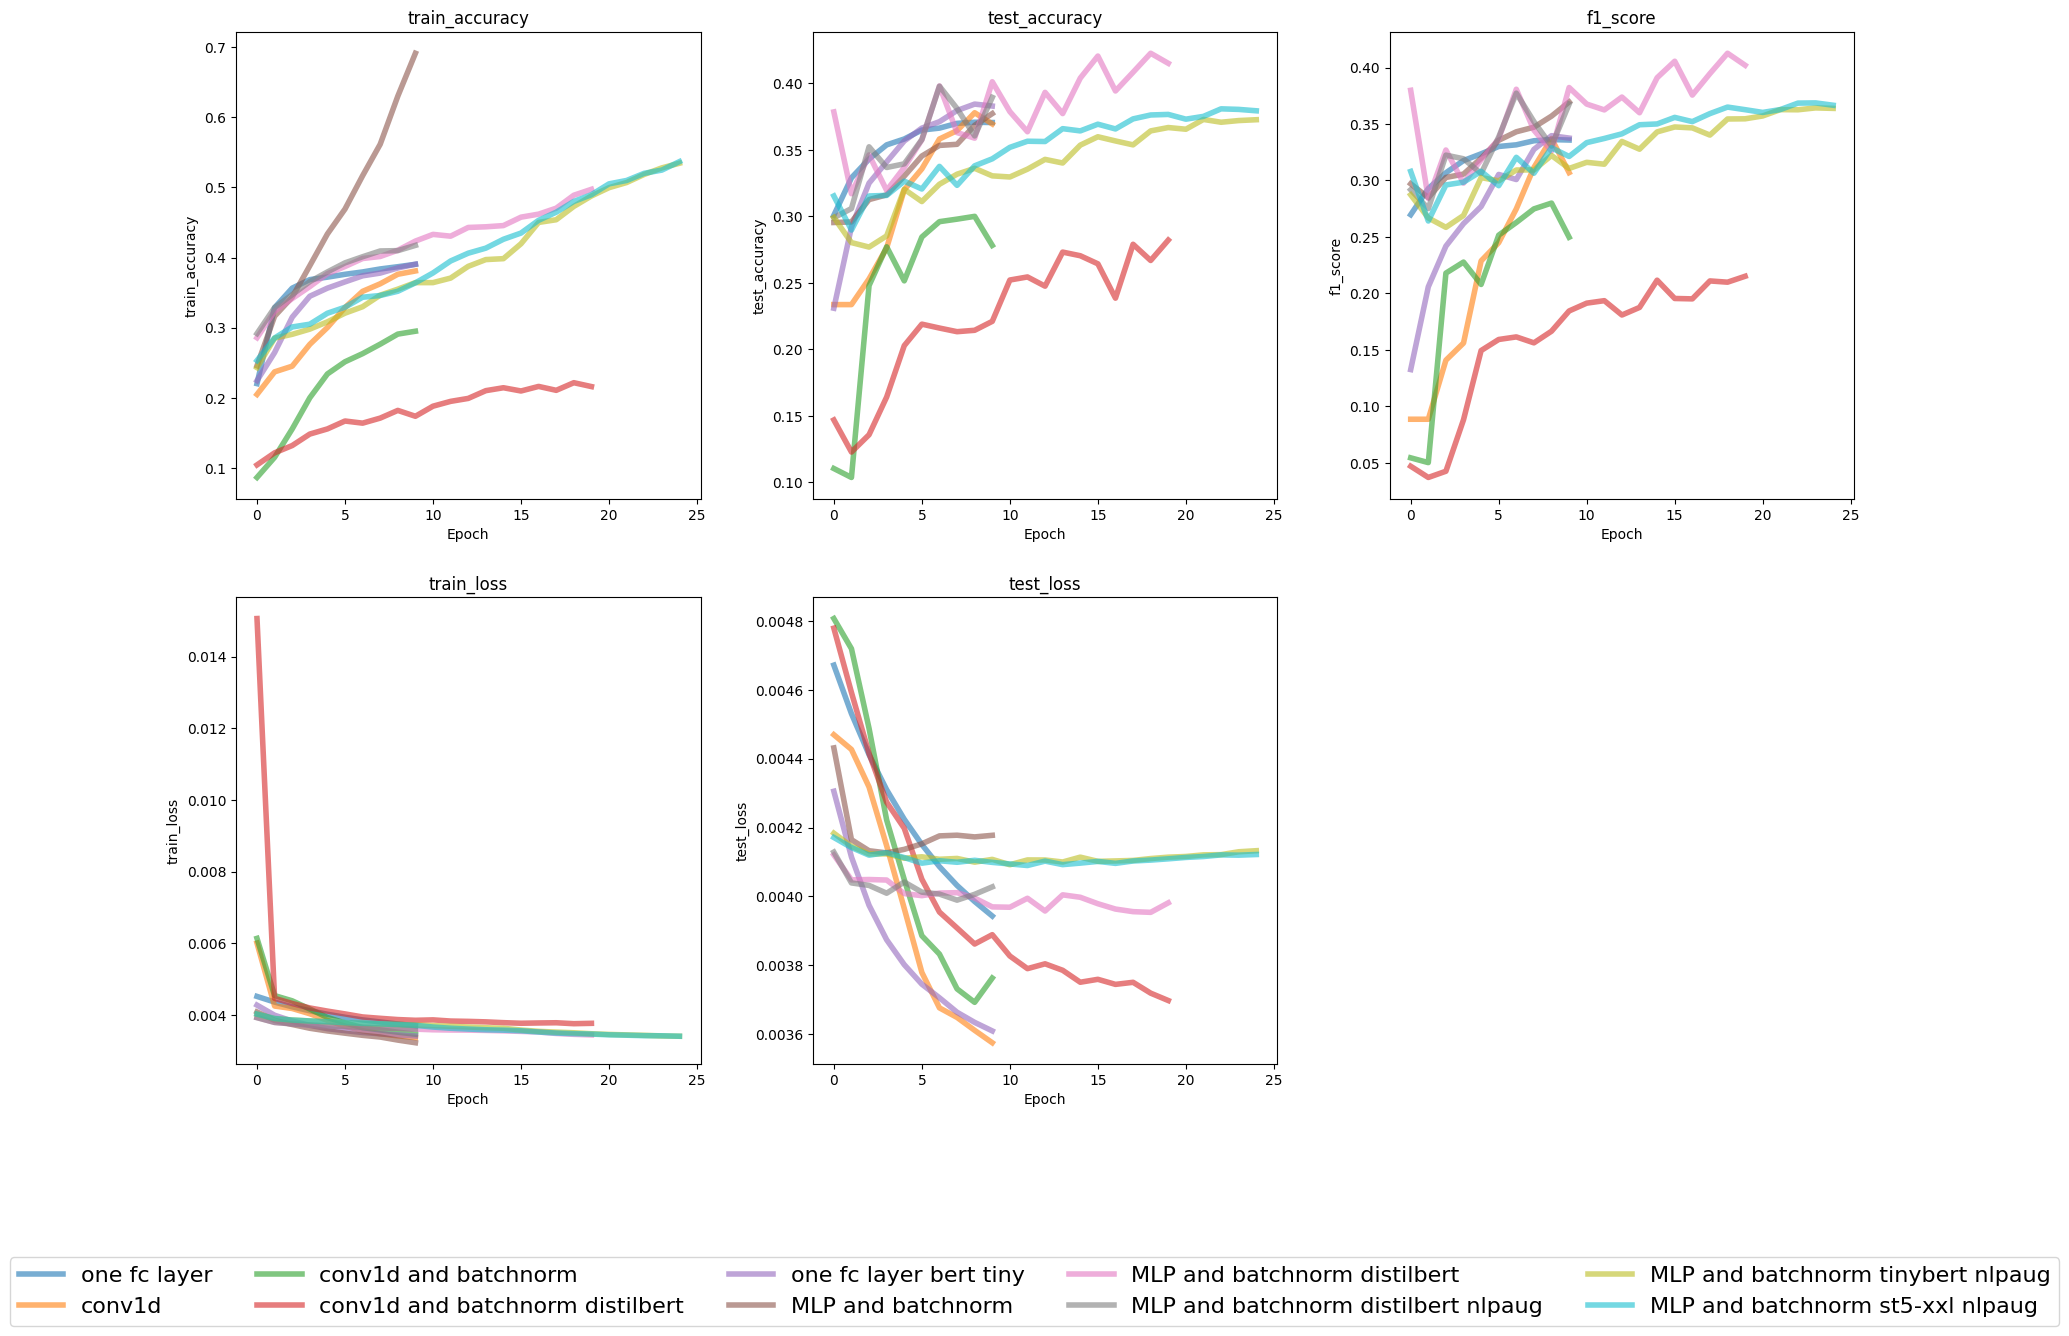

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [
    "embedding-then-one-layer_history.csv",
    "embedding-then-conv1d_history.csv",
    "embedding-then-conv1d-bn-scheduler_history.csv",
    "embedding-then-conv1d-bn-scheduler-distilbert-base_history.csv",
    "embedding-then-one-layer_tiny_bert_history.csv",
    "fc-with-batch-normalization_history.csv",
    "fc-with-batch-normalization-bert-base_history.csv",
    "fc-with-batch-normalization-bert-base-nlpaug_history.csv",
    "fc-with-batch-normalization-bert-tiny-nlpaug_history.csv",
    "fc-with-batch-normalization-st5-xxl-nlpaug_history.csv",
]

line_names = [
    "one fc layer",
    "conv1d",
    "conv1d and batchnorm",
    "conv1d and batchnorm distilbert",
    "one fc layer bert tiny",
    "MLP and batchnorm",
    "MLP and batchnorm distilbert",
    "MLP and batchnorm distilbert nlpaug",
    "MLP and batchnorm tinybert nlpaug",
    "MLP and batchnorm st5-xxl nlpaug",
]

columns_to_plot = [
    "train_accuracy",
    "test_accuracy",
    "f1_score",
    "train_loss",
    "test_loss",
]

dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]

def plot_column(ax, dataframes, column_name, linewidth=1):
    lines = []
    labels = []
    for df, name in zip(dataframes, line_names):
        line, = ax.plot(df[column_name], label=name, linewidth=linewidth, alpha=0.6)
        lines.append(line)
        labels.append(name)
    return lines, labels

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.tight_layout(pad=5)

all_lines = []
all_labels = []

for ax, column_name in zip(axes.flatten(), columns_to_plot):
    lines, labels = plot_column(ax, dataframes, column_name, linewidth = 4)
    ax.set_title(column_name)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(column_name)

    # Collect unique lines and labels for the legend
    for line, label in zip(lines, labels):
        if label not in all_labels:
            all_lines.append(line)
            all_labels.append(label)

# Remove the last (empty) subplot.
fig.delaxes(axes.flatten()[-1])

# Add a single legend for all the plots.
fig.legend(all_lines, all_labels, loc='lower center', ncol=len(csv_files)//2, bbox_to_anchor=(0.5, -0.15), fontsize=16)

plt.show()